In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def euclidean_dist(self, point, data):
        return np.sqrt(np.sum((point - data)**2, axis=1))
    
    def most_common(self, data):
        return max(set(data), key=data.count)
    
    def predict(self, X_train, X_test, y_train, p):
        nn = []
        for test_point in X_test:
            distances = self.euclidean_dist(test_point, X_train)
            y_sorted = [y for _, y in sorted(zip(distances, y_train))]
            nn.append(y_sorted[:self.k])
        return list(map(self.most_common, nn))

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris(as_frame=True)
X = iris['data']
y = iris['target']

X = StandardScaler().fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train[:, :1]
X_test = X_test[:, :1]

In [36]:
classifier = KNNClassifier(k=5)
y_pred = classifier.predict(X_train, X_test, y_train, p=1)

In [34]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7333333333333333


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred =  knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6888888888888889


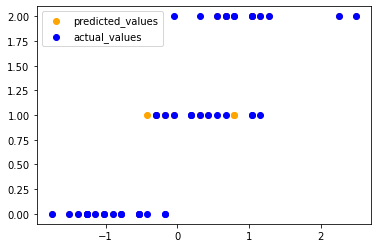

In [41]:
plt.scatter(X_test, y_pred, color='orange')
plt.scatter(X_test, y_test, color='blue')
plt.legend(['predicted_values', 'actual_values'])
plt.show()